# Lab 2 Kryhina CS442a

## Variant

In [4]:
N = (2 + 4 ) % 5 + 1
print(N)

2


## Numbers of tasks: 
3,  4,  5,  8,  9, 11, 12, 13, 14, 16, 17, 18, 
19, 20, 22, 23, 24, 27

## Import

In [16]:
import pandas as pd
df = pd.read_csv('NationalNames.csv')

### Task 3 
#### Отримайте імена стовпців набору даних 

In [22]:
column_names = df.columns
print("Імена стовпців:", column_names)

Імена стовпців: Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


### Task 4 
#### Отримайте загальну інформацію про дані у наборі даних. 

In [80]:
print(df.describe())

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


### Task 5
#### Знайдіть кількість унікальних імен у наборі даних.

In [27]:
unique_names_count = df['Name'].nunique()
print("Кількість унікальних імен:", unique_names_count)

Кількість унікальних імен: 93889


### Task 8
#### Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count  максимальне) 

In [96]:
popular_name_year = df.loc[df['Count'].idxmax()]
print(f"Найпопулярніше ім'я {popular_name_year['Name']} в {popular_name_year['Year']} році")


Найпопулярніше ім'я Linda в 1947 році


### Task 9
#### Підрахуйте кількість записів, для яких Count  - мінімальне у наборі. 

In [31]:
min_count = df['Count'].min()
min_count_records = df[df['Count'] == min_count].shape[0]
print("Кількість записів із мінімальним Count:", min_count_records)

Кількість записів із мінімальним Count: 254615


### Task 11 
#### Знайдіть рік із найбільшою кількістю унікальних імен.

In [33]:
year_max_unique_names = df.groupby('Year')['Name'].nunique().idxmax()
print("Рік із найбільшою кількістю унікальних імен:", year_max_unique_names)

Рік із найбільшою кількістю унікальних імен: 2008


### Task 12 
#### Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен 

In [104]:
year_max_unique_names = df.groupby('Year')['Name'].nunique().idxmax()
popular_name = df[df['Year'] == year_max_unique_names].sort_values(by='Count', ascending=False).iloc[0]
print(f"Найпопулярніше ім'я {popular_name['Name']} в {popular_name['Year']}")


Найпопулярніше ім'я Jacob в 2008


### Task 13 
#### Знайдіть рік, коли ім’я “Jacob”  було найпопулярнішим серед жіночих імен

In [106]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')].sort_values(by='Count', ascending=False).head(1)
print("Рік:", jacob_female['Year'].values[0])


Рік: 2004


### Task 14 
#### Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [46]:
gender_neutral_names = df.groupby(['Name']).filter(lambda x: x['Gender'].nunique() == 2)
year_max_neutral_names = gender_neutral_names.groupby('Year')['Name'].nunique().idxmax()
print("Рік із найбільшою кількістю гендерно нейтральних імен:", year_max_neutral_names)

Рік із найбільшою кількістю гендерно нейтральних імен: 2009


### Task 16
#### Знайдіть рік, коли народилося найбільше дітей

In [54]:
year_max_births = df.groupby('Year')['Count'].sum().idxmax()
print("Рік із найбільшою кількістю народжень:", year_max_births)

Рік із найбільшою кількістю народжень: 1957


### Task 17
#### Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [110]:
gender_count_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print("Кількість дівчаток та хлопчиків кожного року:\n", gender_count_per_year)


Кількість дівчаток та хлопчиків кожного року:
 Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


### Task 18
#### Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків. 

In [58]:
years_more_girls = gender_count_per_year[gender_count_per_year['F'] > gender_count_per_year['M']].shape[0]
print("Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків:", years_more_girls)


Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків: 54


### Task 19
####  Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

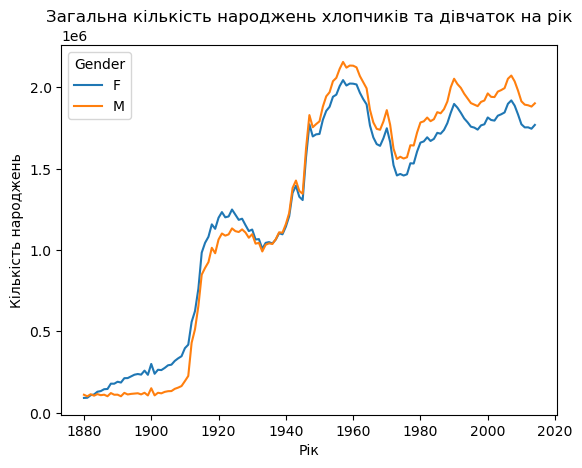

In [148]:
import matplotlib.pyplot as plt

gender_count_per_year.plot()
plt.title('Загальна кількість народжень хлопчиків та дівчаток на рік')
plt.xlabel('Рік')
plt.ylabel('Кількість народжень')
plt.show()

### Task 20
#### Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців) 

In [62]:
neutral_names_count = gender_neutral_names['Name'].nunique()
print("Кількість гендерно нейтральних імен:", neutral_names_count)

Кількість гендерно нейтральних імен: 10221


### Task 23
#### Знайти найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року

In [192]:
# Крок 1: Записуємо всі жіночі імена та їх підрахунок
female_counts = df[df['Gender'] == 'F'].groupby('Name')['Count'].sum().reset_index()
female_counts.columns = ['Name', 'Female_Count']

# Крок 2: Записуємо всі чоловічі імена та їх підрахунок
male_counts = df[df['Gender'] == 'M'].groupby('Name')['Count'].sum().reset_index()
male_counts.columns = ['Name', 'Male_Count']

# Крок 3: Зливаємо обидва датафрейми за спільним ім'ям
common_names = pd.merge(female_counts, male_counts, on='Name', how='inner')
# Крок 4: Підраховуємо загальну кількість для спільних імен
common_names['Total_Count'] = common_names['Female_Count'] + common_names['Male_Count']
# Крок 5: Знаходимо 15 найпопулярніших спільних імен
top_common_names = common_names.nlargest(15, 'Total_Count')

# Виводимо результат
print("15 найпопулярніших спільних імен:")
print(top_common_names[['Name', 'Total_Count']])


15 найпопулярніших спільних імен:
             Name  Total_Count
4230        James      5129096
4676         John      5106590
8096       Robert      4816785
6831      Michael      4330805
6619         Mary      4130441
9923      William      4071368
2370        David      3590557
4760       Joseph      2580687
8033      Richard      2564867
1728      Charles      2376700
9371       Thomas      2291517
1849  Christopher      2004177
2230       Daniel      1876880
3018    Elizabeth      1606282
7561     Patricia      1575529


### Task 24
#### Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів)

In [197]:
# Альтернативний підхід через зведену таблицю
least_popular_name = df.groupby('Name')['Count'].sum().sort_values(ascending=True).head(1)
print("Найпопулярніше серед непопулярних імен:", least_popular_name)


Найпопулярніше серед непопулярних імен: Name
Zzyzx    5
Name: Count, dtype: int64


### Task 27
#### Знайти найпопулярніші імена в кожному році.

In [70]:
most_popular_names_each_year = df.loc[df.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]
print("Найпопулярніші імена в кожному році:\n", most_popular_names_each_year)

Найпопулярніші імена в кожному році:
          Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
